# Diabetes Data Visualisering

### Importera alla språkbiblotek

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Ta bort alla orelevanta features

In [23]:
df = pd.read_csv('diabetes_dataset.csv')
df2 = df.drop(['Sex', 'Ethnicity'], axis=1)
df2


,Unnamed: 0,Age,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,25.0,113.8,142.0,14.5,179,104,261.0,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,32.7,100.4,167.4,8.8,176,118,183.4,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,33.5,110.8,146.4,7.1,122,97,203.2,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,45,39.4,114.0,76.2,13.4,109,82,187.7,60.3,88.7,19.1,6.1,Low,3582,NaN,Former,1,1
9996,9996,41,21.0,71.3,77.1,12.9,154,72,234.3,72.3,200.0,37.1,3.5,Low,2206,NaN,Never,1,1
9997,9997,50,29.0,106.3,97.5,4.9,122,61,266.0,69.8,156.1,85.8,4.9,High,3175,Heavy,Former,1,1
9998,9998,62,27.3,119.9,89.0,11.5,99,115,172.3,74.2,110.9,25.3,5.2,High,3478,Moderate,Never,1,0


## Lägger till en column som diagnoserar folk med diabetes om de har en av de risk värdena högt

In [61]:
df["target"] = (
    (df["Blood_Pressure_Systolic"] >= 180) |
    (df["Blood_Pressure_Diastolic"] >= 110) |
    (df["Fasting_Blood_Glucose"] >= 126)
).astype(int)

### Alla listor för visualisering

In [36]:
age_lista = []
Family_History_of_Diabetes_lista = []
Previous_Gestational_Diabetes_lista = []
ageabove40_lista = []
ageunder40_lista = []
activity_lista = []
activityint_lista = []
activityabove40_lista = []
activityunder40_lista = []
calorieintake_lista =[]
calorieintakeintabove40_lista = []
calorieintakeintunder40_lista = []
bloodpressuresystolic_lista = []
bloodpressurediastolic_lista = []
bloodglucose_lista =[]
bloodpressuresystolicint_lista = []
bloodpressurediastolicint_lista = []
bloodglucoseint_lista =[]
bloodpressuresystolicintabove40_lista = []
bloodpressuresystolicintunder40_lista = []
bloodpressurediastolicintabove40_lista = []
bloodpressurediastolicintunder40_lista = []
bloodglucoseintabove40_lista =[]
bloodglucoseintunder40_lista =[]
previousandfamily_diabetes_lista =[]
previous_diabetes_lista = []
family_diabetes_lista = []
no_diabetes_lista = []

### Tar ut features och gör dom till listor

In [38]:

import csv

with open('diabetes_dataset.csv', newline='') as file:
    reader = csv.DictReader(file)
    for rad in reader:
        age_lista.append(rad['Age'])
        activity_lista.append(rad['Physical_Activity_Level'])
        calorieintake_lista.append(rad['Dietary_Intake_Calories'])
        bloodpressuresystolic_lista.append(rad['Blood_Pressure_Systolic'])
        bloodpressurediastolic_lista.append(rad['Blood_Pressure_Diastolic'])
        bloodglucose_lista.append(rad['Fasting_Blood_Glucose'])
        Family_History_of_Diabetes_lista.append(rad['Family_History_of_Diabetes'])
        Previous_Gestational_Diabetes_lista.append(rad['Previous_Gestational_Diabetes'])


### Tar innehållet i Activity list converterar de till numbers

In [39]:
for i in activity_lista:
    if i == 'Low':
        activityint_lista.append(1)
    elif i == 'Moderate':
        activityint_lista.append(2)
    elif i == 'High':
        activityint_lista.append(3)


### Converterar list inehållen till integrers

In [40]:
ageint_lista = [int(x) for x in age_lista]
calorieintakeint_lista = [int(x) for x in calorieintake_lista]
bloodpressuresystolicint_lista = [int(x) for x in bloodpressuresystolic_lista]
bloodpressurediastolicint_lista = [int(x) for x in bloodpressurediastolic_lista]
bloodglucoseint_lista = [float(x) for x in bloodglucose_lista]
Previous_Gestational_Diabetes_listaint = [int(x) for x in Previous_Gestational_Diabetes_lista]
Family_History_of_Diabetes_listint = [int(x) for x in Family_History_of_Diabetes_lista]

### Sepererar listorna till över 40 års åldern och under 40 års åldern

In [41]:
for age, activity, calorie, systolic, diastolic, glucose in zip(ageint_lista, activityint_lista, calorieintakeint_lista, bloodpressuresystolicint_lista, bloodpressurediastolicint_lista, bloodglucoseint_lista):
    if age >= 40:
        ageabove40_lista.append(age)
        activityabove40_lista.append(activity)
        calorieintakeintabove40_lista.append(calorie)
        bloodpressuresystolicintabove40_lista.append(systolic)
        bloodpressurediastolicintabove40_lista.append(diastolic)
        bloodglucoseintabove40_lista.append(glucose)
        
    else:
        ageunder40_lista.append(age)
        activityunder40_lista.append(activity)
        calorieintakeintunder40_lista.append(calorie)
        bloodpressuresystolicintunder40_lista.append(systolic)
        bloodpressurediastolicintunder40_lista.append(diastolic)
        bloodglucoseintunder40_lista.append(glucose)

## Sepererar folk i olika kategorier beroende på om deras historia med diabetes

In [42]:
for previous, family in zip(Previous_Gestational_Diabetes_listaint, Family_History_of_Diabetes_listint):
    if previous == 1 and family == 1:
        previousandfamily_diabetes_lista.append(1)

    elif previous == 1 and family == 0:
         previous_diabetes_lista.append(1)

    elif previous == 0 and family == 1:
        family_diabetes_lista.append(1)

    elif previous == 0 and family == 0:
        no_diabetes_lista.append(1)

## Får ut medel värde av listorna

In [54]:
bloodglucoseintunder40medel_lista = sum(bloodglucoseintunder40_lista) / len(bloodglucoseintunder40_lista)
bloodglucoseintabove40medel_lista = sum(bloodglucoseintabove40_lista) / len(bloodglucoseintabove40_lista)
calorieintakeintunder40medel_lista = sum(calorieintakeintunder40_lista) / len(calorieintakeintunder40_lista)
calorieintakeintabove40medel_lista = sum(calorieintakeintabove40_lista) / len(calorieintakeintabove40_lista)
bloodpressurediastolicintundermedel40_lista = sum(bloodpressurediastolicintunder40_lista) / len(bloodpressurediastolicintunder40_lista)
bloodpressurediastolicintabovemedel40_lista = sum(bloodpressurediastolicintabove40_lista) / len(bloodpressurediastolicintabove40_lista)
bloodpressuresystolicintundermedel40_lista = sum(bloodpressuresystolicintunder40_lista) / len(bloodpressuresystolicintunder40_lista)
bloodpressuresystolicintabovemedel40_lista = sum(bloodpressuresystolicintabove40_lista) / len(bloodpressuresystolicintabove40_lista)

# Visualisering

## Medel kalorie intag för folk under och över 40 års åldern

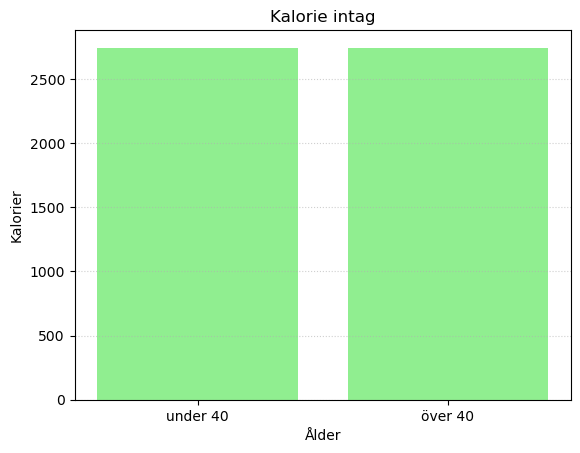

In [46]:
ålder3 = ['under 40', 'över 40']
värden3 = [calorieintakeintunder40medel_lista, calorieintakeintabove40medel_lista]
plt.bar(ålder3, värden3, color='lightgreen')
plt.title("Kalorie intag")
plt.xlabel("Ålder")
plt.ylabel("Kalorier")
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.show()

## Medel värde för systolisc och diastolic blood pressure för under och över 40 års åldern 

#### Systoliskt < 120 mmHg och diastoliskt < 80 mmHg = optimalt blodtryck – idealt för hjärtats hälsa.
#### Systoliskt 120–129 mmHg och diastoliskt 80–84 mmHg = normalt blodtryck – fortfarande hälsosamt.
#### Systoliskt 130–139 mmHg och diastoliskt 85–89 mmHg = högt normalt – ökad risk, livsstilsförändringar rekommenderas.
#### Systoliskt 140–159 mmHg och diastoliskt 90–99 mmHg = hypertoni grad 1 – mild form av högt blodtryck.
#### Systoliskt 160–179 mmHg och diastoliskt 100–109 mmHg = hypertoni grad 2 – måttligt högt blodtryck.
#### Systoliskt ≥ 180 mmHg och diastoliskt ≥ 110 mmHg = hypertoni grad 3 – allvarligt högt blodtryck, stor risk för stroke och hjärtinfarkt.

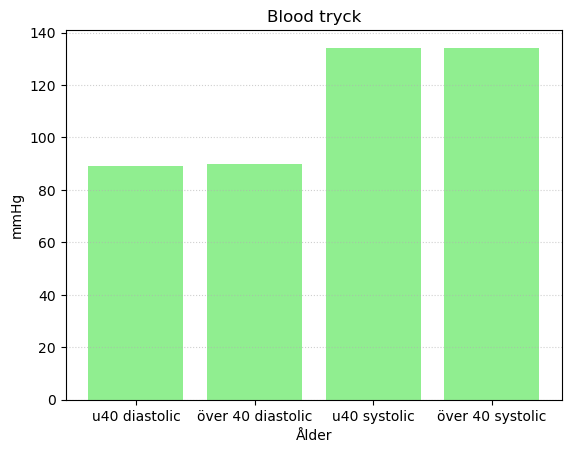

In [58]:
ålder2 = ['u40 diastolic', 'över 40 diastolic', 'u40 systolic', 'över 40 systolic']
värden2 = [bloodpressurediastolicintundermedel40_lista, bloodpressurediastolicintabovemedel40_lista, bloodpressuresystolicintundermedel40_lista, bloodpressuresystolicintabovemedel40_lista ]
plt.bar(ålder2, värden2, color='lightgreen')
plt.title("Blood tryck")
plt.xlabel("Ålder")
plt.ylabel("mmHg")
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.show()

## Medel bloodglucose för folk under och över 40 års åldern

#### Ett fastande blodsocker under 100 mg/dL är normalt.

#### 100–125 mg/dL = prediabetes – signal om att du bör se över livsstilen.

#### 126 mg/dL eller mer = hög risk för diabetes (bekräftas med ytterligare tester).

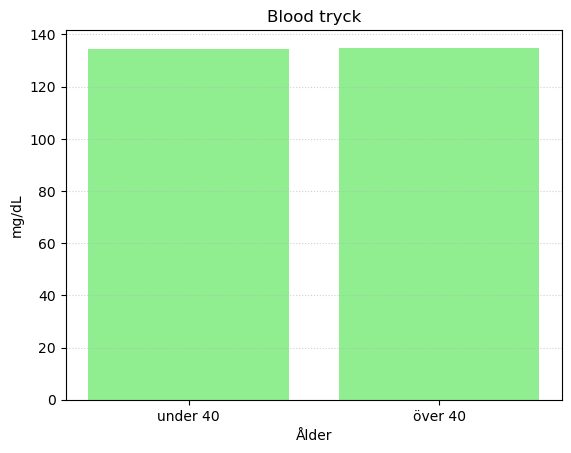

In [59]:
ålder4 = ['under 40', 'över 40']
värden4 = [bloodglucoseintunder40medel_lista, bloodglucoseintabove40medel_lista]
plt.bar(ålder4, värden4, color='lightgreen')
plt.title("Blood tryck")
plt.xlabel("Ålder")
plt.ylabel("mg/dL")
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.show()

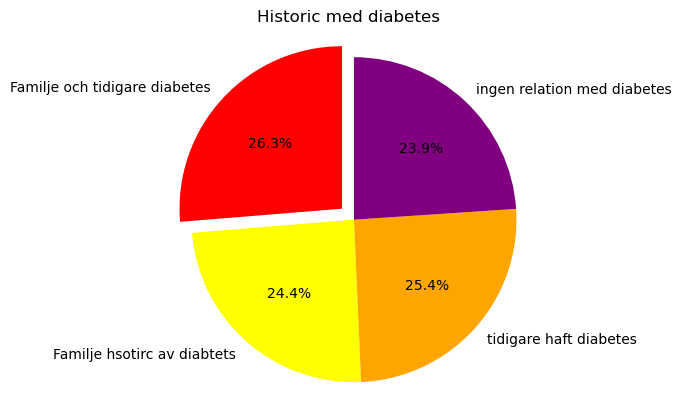

In [60]:

Historik = ['Familje och tidigare diabetes', 'Familje hsotirc av diabtets', 'tidigare haft diabetes', 'ingen relation med diabetes']
storlekar = [sum(previousandfamily_diabetes_lista), sum(family_diabetes_lista),sum(previous_diabetes_lista) , sum(no_diabetes_lista)]  
färger = ['red', 'yellow', 'orange', 'purple']
explodera = (0.1, 0, 0, 0) 


plt.pie(storlekar, labels= Historik, colors=färger, explode=explodera,
        autopct='%1.1f%%', startangle=90)

plt.axis('equal') 
plt.title('Historic med diabetes')
plt.show()

# AI

## Vilket typ av problem har jag?

### Jag vill räkna ut risken för att användare kan utveckla diabetes beroende på deras input

### Vad är features och target

### Välj rätt modell

### Träning o test data

### Anpassa modell score

### Förbätrra modell